# Yelp Dataset Challenge

![Yelp Data Challenge](https://s3-media3.fl.yelpcdn.com/assets/srv0/engineering_pages/6d323fc75cb1/assets/img/dataset/960x225_dataset@2x.png)

## Data processing

### 1. Load data into Pandas DataFrame

In [1]:
import json
import pandas as pd

#### Prepare dataset

The downloaded dataset is 6.8 GB. Very large!

Use smaller dataset for testing purpose.

In [2]:
path = '/Users/ytshen/Desktop/Machine_Learning/Yelp_data_challenge_round_12/'

# smaller data
smaller_business, smaller_checkin, smaller_review, smaller_tip, smaller_user = [
    'sample_business.json',
    'sample_checkin.json',
    'sample_review.json',
    'sample_tip.json',
    'sample_user.json'
]

# all data
all_business, all_checkin, all_review, all_tip, all_user = [
    'yelp_academic_dataset_business.json',
    'yelp_academic_dataset_checkin.json',
    'yelp_academic_dataset_review.json',
    'yelp_academic_dataset_tip.json',
    'yelp_academic_dataset_user.json',
]

In [3]:
# Use smaller data
# file_business, file_checkin, file_review, file_tip, file_user = [
#     path + smaller_business,
#     path + smaller_checkin,
#     path + smaller_review,
#     path + smaller_tip,
#     path + smaller_user
# ]

In [4]:
# Use all data
file_business, file_checkin, file_review, file_tip, file_user = [
    path + all_business,
    path + all_checkin,
    path + all_review,
    path + all_tip,
    path + all_user
]

In [5]:
# # Print out file names
# print(file_business)
# print(file_checkin)
# print(file_review)
# print(file_tip)
# print(file_user)

#### Try to load json file into Pandas DataFrame
* Try to use `pandas.read_json()` to load file, but it doesn't work.
* Try to use `json.loads()` to load file. There is a 's' in `loads()`.

In [6]:
# # Test to load single file
# with open(file_business) as f:
#     df_test1 = pd.DataFrame(json.loads(line) for line in f) # 注意 loads() 要有 s

# # Check
# df_test1.head()

In [7]:
# df_test1.info()

In [8]:
# Loading a single file works, wrap in function
def read_json_file(input_file):
    with open(input_file) as fin:
        df = pd.DataFrame(json.loads(line) for line in fin)
    return df

In [9]:
# df_test2 = read_json_file(file_business)
# df_test2.head()

In [10]:
# # Compare two DataFrame, they should be equal.
# df_test2.equals(df_test1)

#### Load all files into DataFrame.

In [11]:
df_business = read_json_file(file_business)
# df_checkin = read_json_file(file_checkin)
df_review = read_json_file(file_review)
# df_tip = read_json_file(file_tip)
# df_users = read_json_file(file_user)

In [12]:
# Check
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [13]:
# df_business.equals(df_test1)

In [14]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [15]:
# df_checkin.info()

In [16]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [17]:
# df_tip.info()

In [18]:
# df_users.info()

### 2. Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [19]:
# # Make there is Las Vages in city
# df_business['city'].value_counts()

In [20]:
# # Set the mask for city
# mask_city = df_business['city'] == 'Las Vegas'

In [21]:
# df_business[mask_city].head()

In [22]:
# # Check the categories
# df_business['categories'].head(30)

In [23]:
# df_business[df_business['categories'].isnull()]

In [24]:
# # Set the mask for restaurant
# print(df_business['categories'].isnull().sum())
# null_categories = df_business['categories'].isnull()

In [25]:
# print(df_business[~null_categories]['categories'].count())
# print(df_business['categories'].notnull().sum())

In [26]:
# mask_restaurants = df_business[~null_categories]['categories'].apply(lambda x: True if 'Restaurants' in x else False)

In [27]:
# print(mask_restaurants)

In [28]:
# Create Pandas DataFrame filters
city = df_business['city'] == 'Las Vegas'

null_categories = df_business['categories'].isnull()
restaurants = df_business[~null_categories]['categories'].apply(lambda x: True if 'Restaurants' in x else False)
# Also can use .apply(str).str.contains("Restaurants")
# restaurants = df_business[~null_categories]['categories'].apply(str).str.contains("Restaurants")

In [29]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[city & restaurants]

In [30]:
# df_filtered.head()

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [31]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [32]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [33]:
# df_selected_business.head()

In [34]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={'stars':'avg_stars'}, inplace=True)

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [35]:
# Check
df_selected_business.head()

,business_id,name,categories,avg_stars
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
61,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


In [36]:
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6148 entries, 19 to 188567
Data columns (total 4 columns):
business_id    6148 non-null object
name           6148 non-null object
categories     6148 non-null object
avg_stars      6148 non-null float64
dtypes: float64(1), object(3)
memory usage: 240.2+ KB


#### Save results to csv files

In [37]:
df_selected_business.to_csv(path + 'selected_business.csv', index=False)

In [38]:
# Try reload the csv file to check if everything works fine
df_selected_business_test = pd.read_csv(path + 'selected_business.csv')

In [39]:
df_selected_business_test.head()

,business_id,name,categories,avg_stars
0,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
1,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
2,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
3,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
4,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5


In [40]:
# compare DataFrame
# df_selected_business_test.equals(df_selected_business) # 為什麼顯示是 False 啊？

In [41]:
# Check the reason why the two dataframes are different
# print(df_selected_business.info())
# print(df_selected_business_test.info())
# I found the index ranges are different between two DataFrames

In [42]:
# reset index and drop the original index
# df_selected_business.reset_index(drop=True).info()

In [43]:
# Now the two dataframes are the same after reseting index
# df_selected_business_test.equals(df_selected_business.reset_index(drop=True))

In [44]:
# Release memory
del df_selected_business_test

### 3. Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Prepare dataframes to be joined, - on business_id

In [45]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = pd.read_csv(path + 'selected_business.csv')

df_left.set_index('business_id', inplace=True)

In [46]:
# df_left.head()

In [47]:
# df_left.info()

In [48]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.copy()

df_right.set_index('business_id', inplace=True)

In [49]:
# df_right.head()

In [50]:
# df_right.info()

#### convert data column from object to datatime

In [51]:
df_right['date'] = pd.to_datetime(df_right['date'])

In [52]:
# df_right.info()

In [53]:
# df_right.head()

#### Join! and reset index

In [54]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6148 entries, vJIuDBdu01vCA8y1fwR1OQ to 0zGeYN8ReYwVj27U7EHOJA
Data columns (total 3 columns):
name          6148 non-null object
categories    6148 non-null object
avg_stars     6148 non-null float64
dtypes: float64(1), object(2)
memory usage: 192.1+ KB


In [55]:
df_right.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5996996 entries, iCQpiavjjPzJ5_3gPD5Ebg to 6E4i0NHTRAgpwbbRwZhlnw
Data columns (total 8 columns):
cool         int64
date         datetime64[ns]
funny        int64
review_id    object
stars        int64
text         object
useful       int64
user_id      object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 411.8+ MB


In [56]:
# Join df_left and df_right.
# use left join to keep everything in the left table
df_joined_left = pd.merge(df_left, df_right, how='left', on='business_id')
df_joined_left.head()

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,,,,
vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-02,0,UgwmWy_68S_aKR9wTWKGOg,3,I am a huge fan of both locally owned business...,4,jSD05fFrAFa5gX3ZQae1tw
vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,2,2015-06-08,2,AywPsODuQbUMhBEjmKiGXw,1,Let me start off by saying. If you cant make a...,8,oagZh5A2cWJXZBLakS_KpQ
vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-08,0,6j39TEUBDBTEK37OKACWLw,1,Decent product. ..HORRIBLE service. Totally un...,2,6BSwuyc7fvcccJgrY4_W5Q
kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-07-03,0,c6iTbCMMYWnOd79ZiWwobg,1,"I ordered a few 12 inch sandwiches , a turkey ...",1,ih7Dmu7wZpKVwlBRbakJOQ
kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2010-06-20,2,fisvc16rY1Q5NTX_O_QQ2A,1,A very dirty place. You can watch the employee...,3,zqL43wHcz133AVvEuba67w


In [57]:
# reset the index
df_joined_left.reset_index(inplace=True)

In [58]:
# use inner join to keep common part in both tables
df_joined_inner = pd.merge(df_left, df_right, how='inner', on='business_id')
df_joined_inner.head()
# reset the index
df_joined_inner.reset_index(inplace=True)

In [59]:
# Inspect left-join and inner-join tables
# df_joined_left.info()
# 本來應該要有 6148 筆數據才對，但是因為 df_right 中同一個 business_id 有不同的 review，所以合併後數目變多了

In [60]:
# df_joined_inner.info()
# 本來應該小於 6148 筆數據才對，但是因為 df_right 中同一個 business_id 有不同的 review，所以合併後數目變多了

In [61]:
# df_joined_inner.equals(df_joined_left)

#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [62]:
# Check the date in the dataframes
# print(df_joined_inner['date'].min())
# print(df_joined_inner['date'].max())
# print(df_joined_left['date'].min())
# print(df_joined_left['date'].max())

In [63]:
# Make a filter that selects date after 2015-01-20
df_joined = df_joined_inner # use inner joint
# Only select two years records
two_years = df_joined['date'] > '2016-07-01'

In [64]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[two_years]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398037 entries, 3 to 1053071
Data columns (total 12 columns):
business_id    398037 non-null object
name           398037 non-null object
categories     398037 non-null object
avg_stars      398037 non-null float64
cool           398037 non-null int64
date           398037 non-null datetime64[ns]
funny          398037 non-null int64
review_id      398037 non-null object
stars          398037 non-null int64
text           398037 non-null object
useful         398037 non-null int64
user_id        398037 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 39.5+ MB


#### Take a glance at the final dataset

In [65]:
import matplotlib.pyplot as plt

%matplotlib inline

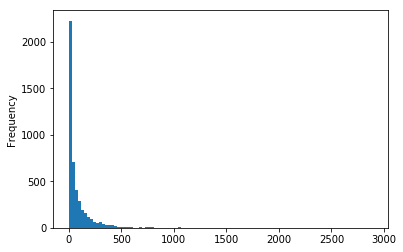

In [66]:
# calculate counts of reviews per business entity, and plot it
df_final['business_id'].value_counts().plot(kind='hist', bins=100)
plt.show()

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [67]:
df_final.to_csv('last_2_years_restaurant_reviews.csv', index=False, encoding='utf-8')